<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2025/blob/main/Module_5/25_Bayesian_Coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notebook for the University of Tennessee, Knoxville, Department of Materials Science and Engineering Spring 2024 Course, MSE 510
- Instructor Sergei V. Kalinin

- These examples are based on the book "Bayesian Analysis with Python" by Oswaldo Martin, https://subscription.packtpub.com/book/data/9781805127161/pref


In [1]:
import numpy as np
from scipy.stats import norm, binom, beta, bernoulli, t, multivariate_normal, poisson, randint, entropy, laplace, logistic
import matplotlib.pyplot as plt

# Visualizing Gaussian Distirbution

Let's create Gaussian distribution with defined mean and dispersion, and draw three samples from it.

In [2]:
μ = 0.
σ = 1.
X = norm(μ, σ)
x = X.rvs(3)

print(x)

[0.43446687 1.162587   0.14783539]


Now, let's visualize how Gaussian distributions look like for different mean and dispersions.  

[]

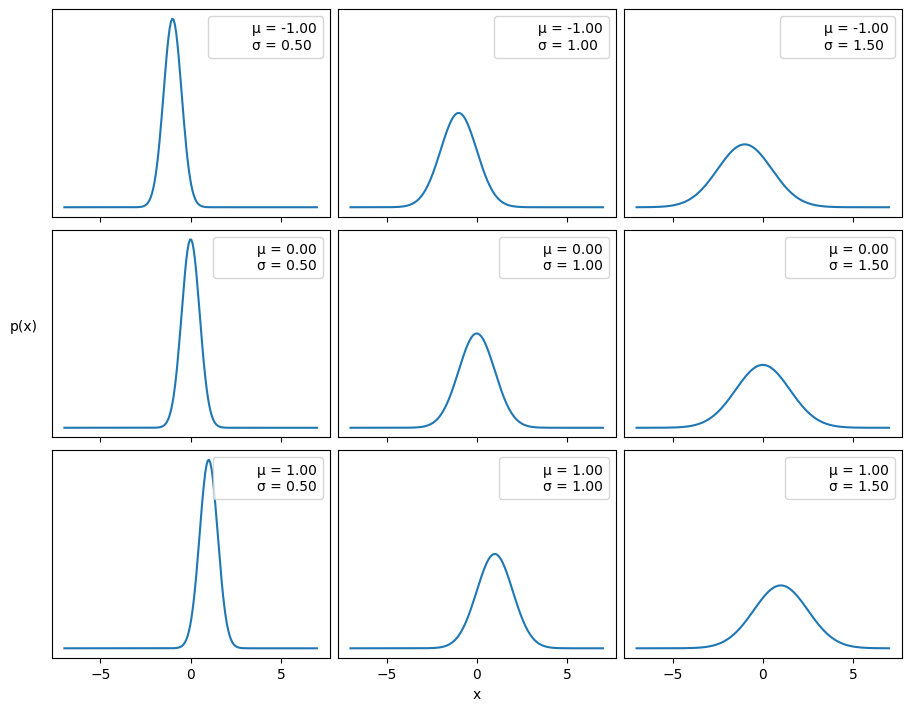

In [3]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)

_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True,
                     sharey=True,
                     figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu,
                     sd), alpha=0)
        ax[i,j].legend(loc=1)

ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])

# Coin toss the Bayesian way

## Visualizing Binomial Distirbution

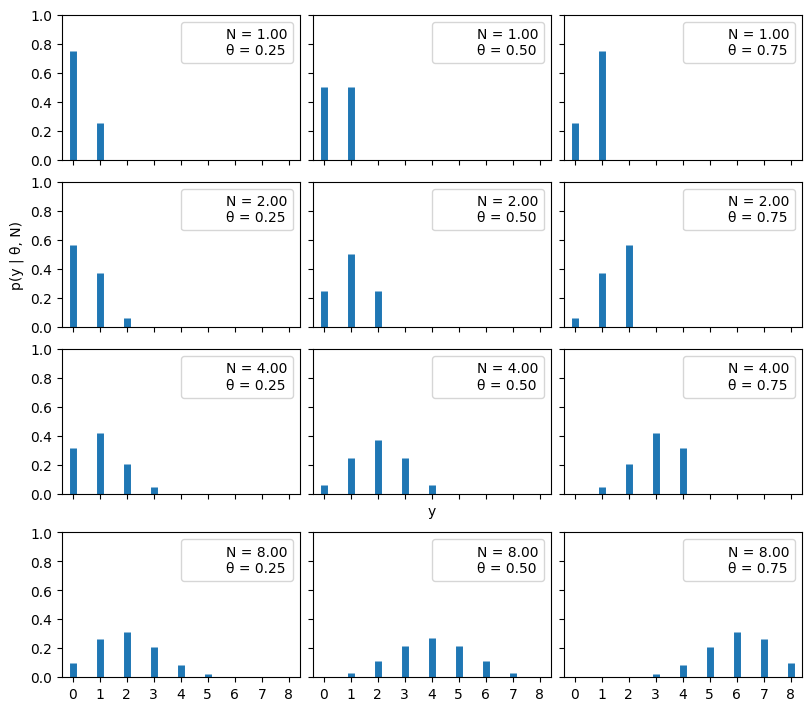

In [4]:
n_params = [1, 2, 4, 8]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True,
                    sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = binom(n=n, p=p).pmf(x)

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)

## Beta distribution

Text(0.07, 0.5, 'p(θ)')

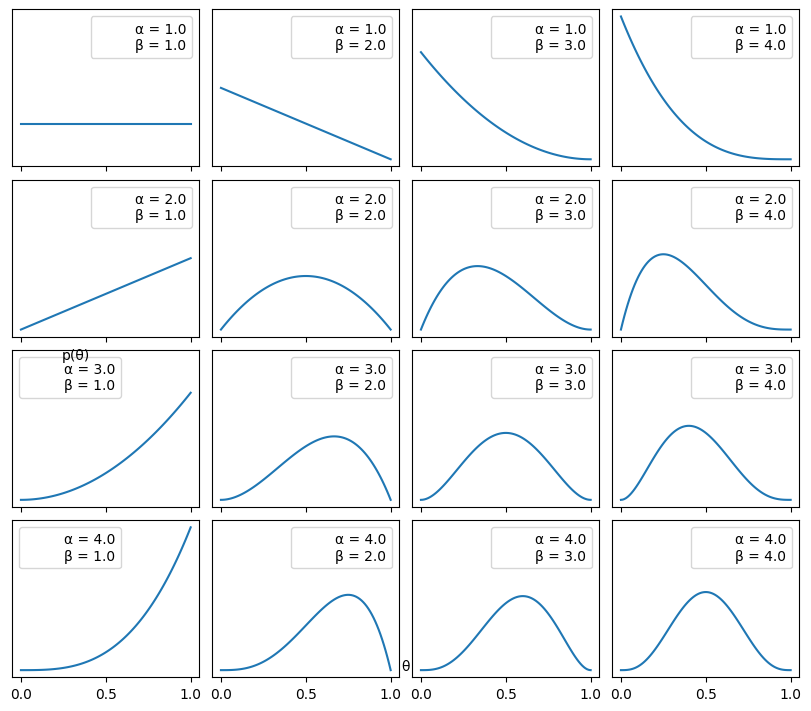

In [5]:
params = [1, 2, 3, 4]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True,
                     sharey=True,
                     figsize=(8, 7), constrained_layout=True)

for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,
                     b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

## Coin toss

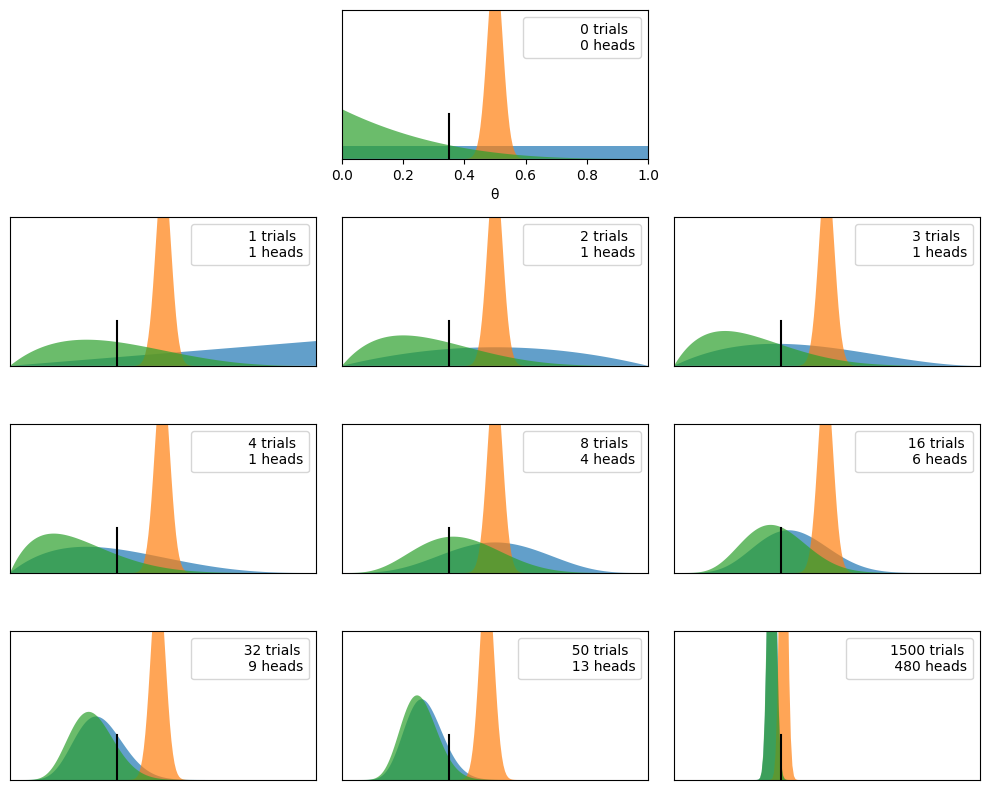

In [6]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 1500]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 480]
theta_real = 0.35

beta_params = [(1, 1), (200, 200), (1, 4)]
dist = beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

# Bayesian Inference in action

In [7]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 5.8 MB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import preliz as pz

Now, let's play with the concepts of priors, likelihoods, data, and posteriors. Let's start with the example where:
-  we generate data from Gaussian distribution N(mu, sigma).
- As a model, we assume that the data is sampled from Gaussian distribution with **unknown** parameters
- As a priors, we assume the uniform distribution for mu within a certain range, and uniform distribution for sigma

(100,)


/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:287: RuntimeWarning: divide by zero encountered in nb_logpdf
  return super().__call__(*args, **kws)


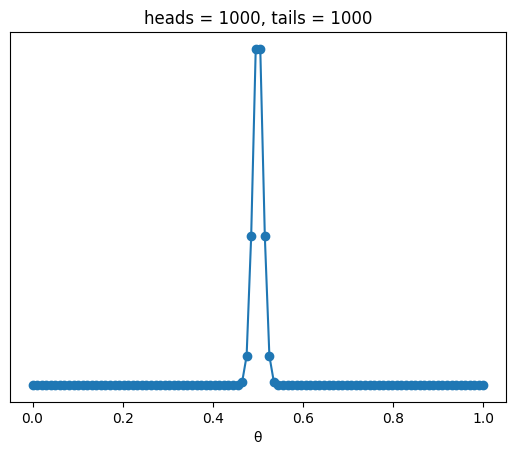

In [9]:
def posterior_grid(grid_points=50, heads=6, tails=9):
    """
    A grid implementation for the coin-flipping problem
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points)  # uniform prior
    likelihood = pz.Binomial(n=heads+tails, p=grid).pdf(heads)
    posterior = likelihood * prior
    print(posterior.shape)
    posterior /= posterior.sum() * (1/grid_points)
    return grid, posterior, likelihood

data = np.repeat([0, 1], (1000, 1000))
points = 100
h = data.sum()
t = len(data) - h
grid, posterior, likelihood = posterior_grid(points, h, t)

plt.plot(grid, posterior, 'o-')

plt.title(f'heads = {h}, tails = {t}')
plt.yticks([])
plt.xlabel('θ');
plt.show()

#plt.plot(likelihood)

Now, let's try 2D example!

Dimensionality  (120,)


<ipython-input-10-ccf4dbc36a36>:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  evidence = np.trapz(np.trapz(likelihood * prior, mu_vals, axis=1), sigma_vals)


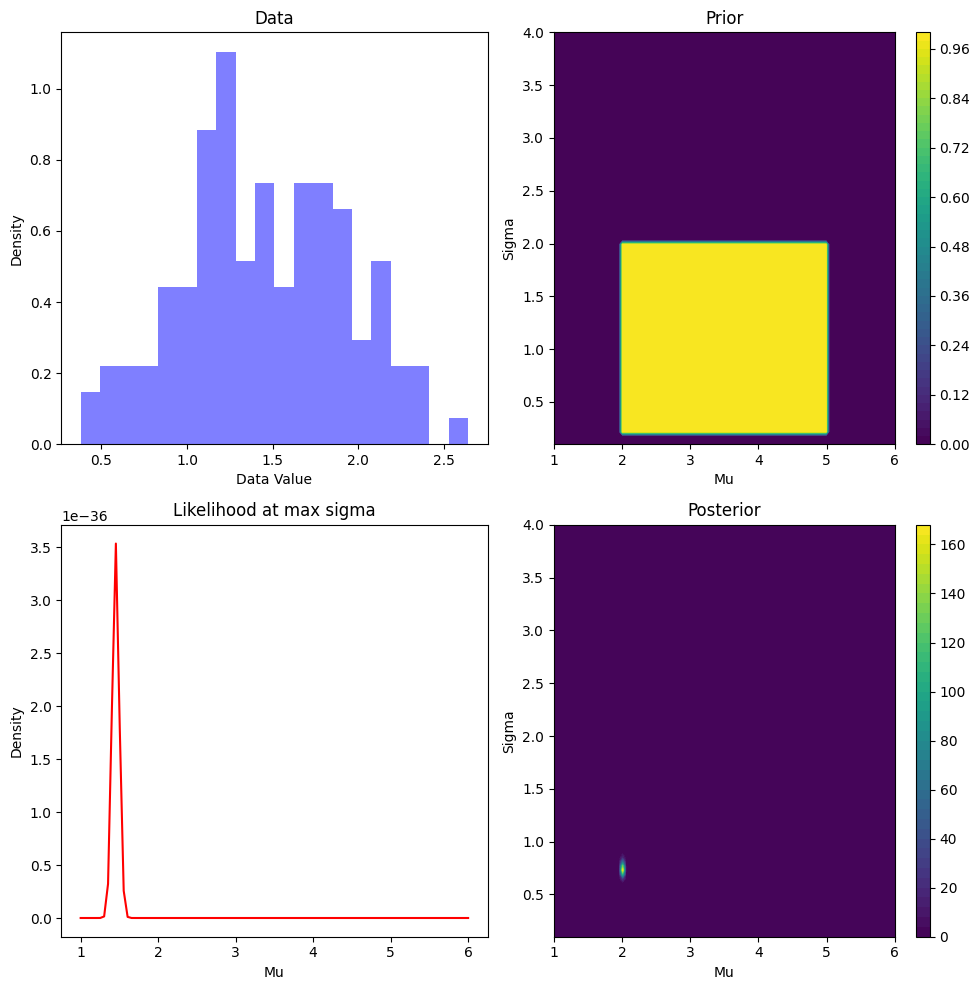

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(420)
data = np.random.normal(1.5, 0.5, 120)

# Create a grid of mu and sigma values
mu_vals = np.linspace(1, 6, 100)
sigma_vals = np.linspace(0.1, 4, 100)

mu_grid, sigma_grid = np.meshgrid(mu_vals, sigma_vals)

# Prior for mu is uniform between 2 and 3
prior_mu = np.where((mu_grid > 2) & (mu_grid < 5), 1, 0.000)
# Prior for sigma is non-negative (for simplicity, uniform between 0.1 and 2)
prior_sigma = np.where((sigma_grid > 0.2) & (sigma_grid < 2), 1, 0.000) # 1  # This is a constant because we are assuming a uniform prior for sigma over its range

prior = prior_mu * prior_sigma

# Likelihood for both mu and sigma

exmp = 1 / (np.sqrt(2 * np.pi) * 1) * np.exp(-(data - 1)**2 / (2 * 1**2))
print("Dimensionality ", exmp.shape)

likelihood = np.array([[np.prod(1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(data - mu)**2 / (2 * sigma**2)))
                       for mu in mu_vals] for sigma in sigma_vals])

# Evidence
evidence = np.trapz(np.trapz(likelihood * prior, mu_vals, axis=1), sigma_vals)

# Posterior
posterior = likelihood * prior / evidence

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Data
axes[0, 0].hist(data, bins=20, density=True, alpha=0.5, color='blue', label='Data')
axes[0, 0].set_title('Data')
axes[0, 0].set_xlabel('Data Value')
axes[0, 0].set_ylabel('Density')

# Prior
contour = axes[0, 1].contourf(mu_grid, sigma_grid, prior, levels=50)
axes[0, 1].set_title('Prior')
axes[0, 1].set_xlabel('Mu')
axes[0, 1].set_ylabel('Sigma')
fig.colorbar(contour, ax=axes[0, 1], aspect=30)

# Likelihood (just showing maximum likelihood value for simplicity)
max_likelihood_idx = np.unravel_index(np.argmax(likelihood), likelihood.shape)
axes[1, 0].plot(mu_vals, likelihood[max_likelihood_idx[0]], 'r-')
axes[1, 0].set_title('Likelihood at max sigma')
axes[1, 0].set_xlabel('Mu')
axes[1, 0].set_ylabel('Density')

# Posterior
contour = axes[1, 1].contourf(mu_grid, sigma_grid, posterior, levels=50)
axes[1, 1].set_title('Posterior')
axes[1, 1].set_xlabel('Mu')
axes[1, 1].set_ylabel('Sigma')
fig.colorbar(contour, ax=axes[1, 1], aspect=30)

plt.tight_layout()
plt.show()


Now, experiment with this code. Consider what will happen if:
- you change the number of points from very small (say 3) to large (1000)
- what happens if parameters of our data generation process falls within the priors, or are well outside
- and experiment with narrow/broad priors
- consider the combinations of these (small data/large data, narrow/broad priors, correct/incorrect priors)

# More examples of BI

For examples below, identify what is data generation process, what is model/likelihood, what are priors, and what are posteriors.

## Example 1

<ipython-input-11-3c9c76fab48e>:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  evidence = np.trapz(likelihood * prior, theta)


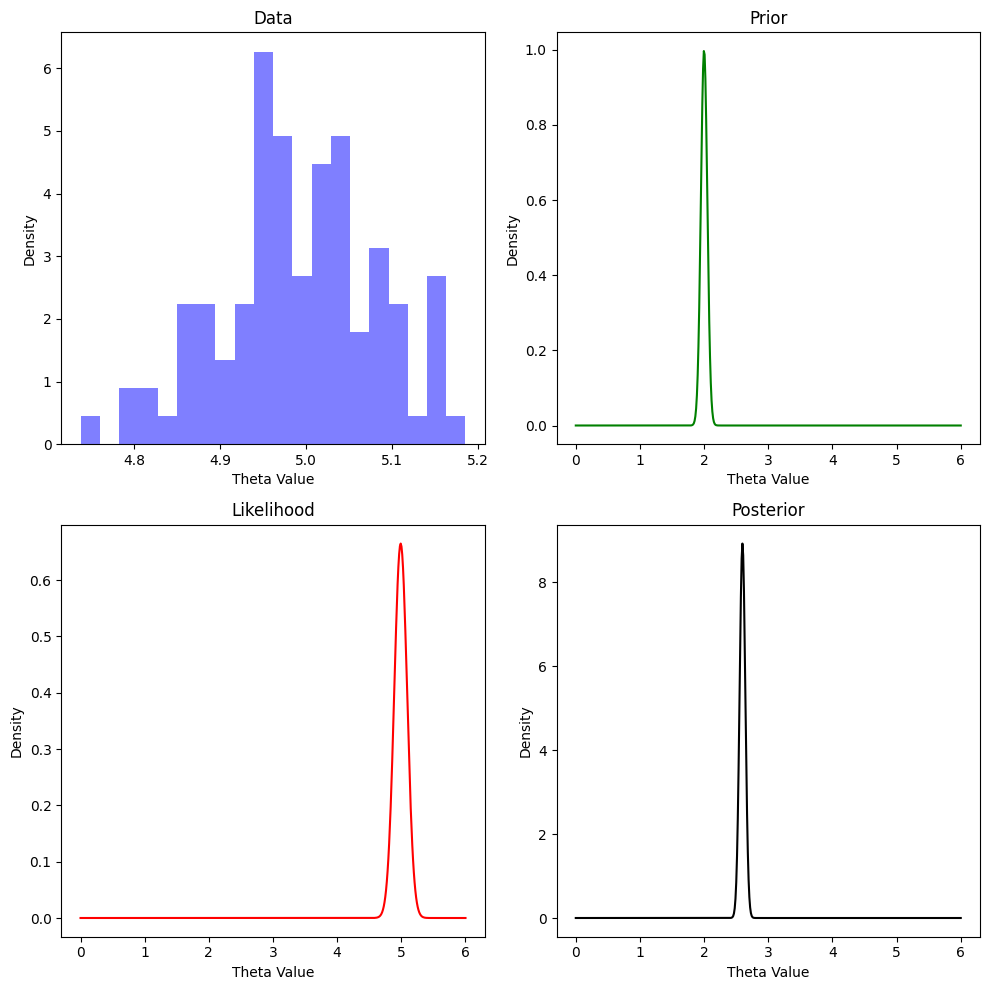

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
data = np.random.normal(5, 0.1, 100)

# Create a grid of theta values (our parameter of interest)
theta = np.linspace(0, 6, 500)

# Prior: N(2,1)
prior = np.exp(-(theta - 2)**2 / (2*(0.05)**2))

# Likelihood: Product of N(theta,1) for each data point
likelihood = np.prod([np.exp(-(data - t)**2 / (2*1**2)) for t in theta], axis=1)

# Evidence (computed by integrating the product of the likelihood and the prior over all theta)
evidence = np.trapz(likelihood * prior, theta)

# Posterior: likelihood * prior / evidence
posterior = likelihood * prior / evidence

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Data
axes[0, 0].hist(data, bins=20, density=True, alpha=0.5, color='blue', label='Data')
axes[0, 0].set_title('Data')
axes[0, 0].set_xlabel('Theta Value')
axes[0, 0].set_ylabel('Density')

# Prior
axes[0, 1].plot(theta, prior, 'g-')
axes[0, 1].set_title('Prior')
axes[0, 1].set_xlabel('Theta Value')
axes[0, 1].set_ylabel('Density')

# Likelihood
axes[1, 0].plot(theta, likelihood, 'r-')
axes[1, 0].set_title('Likelihood')
axes[1, 0].set_xlabel('Theta Value')
axes[1, 0].set_ylabel('Density')

# Posterior
axes[1, 1].plot(theta, posterior, 'k-')
axes[1, 1].set_title('Posterior')
axes[1, 1].set_xlabel('Theta Value')
axes[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()


## Example 2

<ipython-input-12-59dc65d03173>:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  evidence = np.trapz(likelihood * prior, theta)


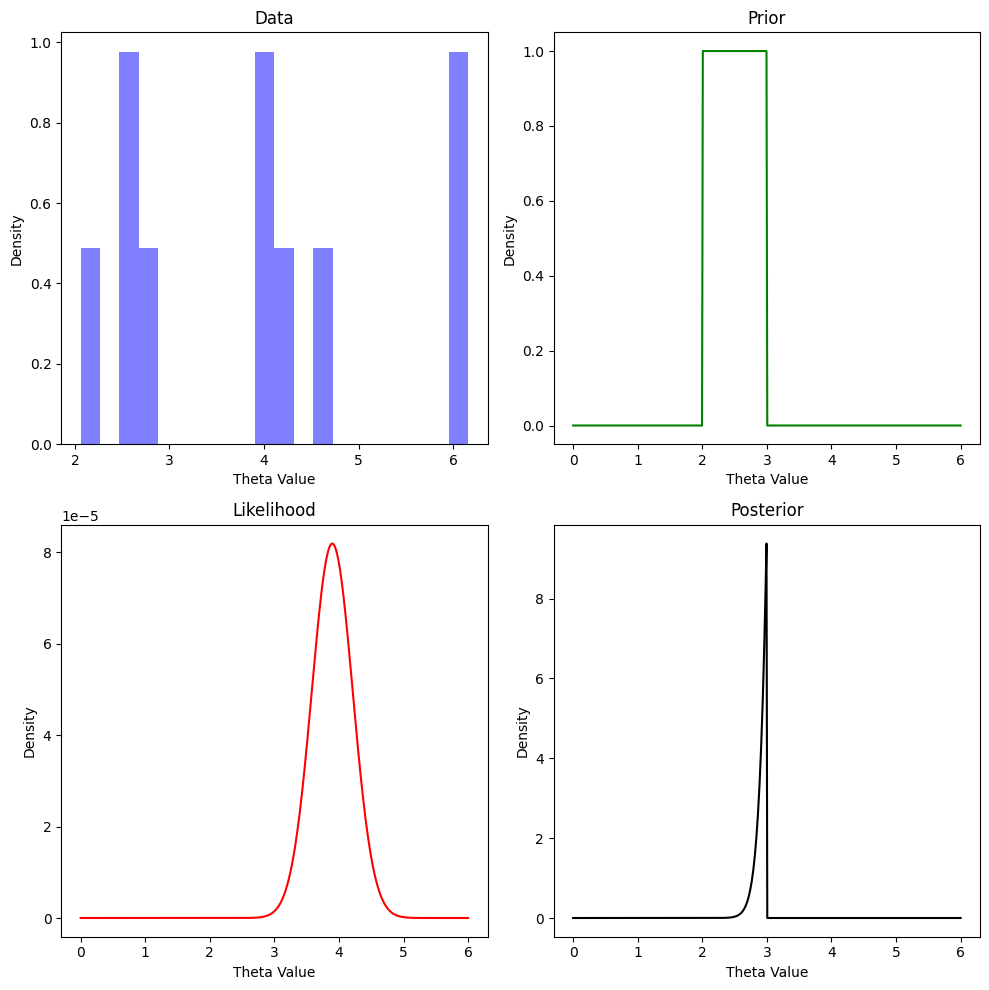

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
data = np.random.normal(3, 2, 10)

# Create a grid of theta values (our parameter of interest)
theta = np.linspace(0, 6, 500)

# Prior: Uniform in the range [2, 3]
prior = np.where((theta >= 2) & (theta <= 3), 1, 0)

# Likelihood: Product of N(theta,1) for each data point
likelihood = np.exp(-0.5 * np.sum((data[:, None] - theta)**2, axis=0))

# Evidence (computed by integrating the product of the likelihood and the prior over all theta)
evidence = np.trapz(likelihood * prior, theta)

# Posterior: likelihood * prior / evidence
posterior = likelihood * prior / evidence

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Data
axes[0, 0].hist(data, bins=20, density=True, alpha=0.5, color='blue')
axes[0, 0].set_title('Data')
axes[0, 0].set_xlabel('Theta Value')
axes[0, 0].set_ylabel('Density')

# Prior
axes[0, 1].plot(theta, prior, 'g-')
axes[0, 1].set_title('Prior')
axes[0, 1].set_xlabel('Theta Value')
axes[0, 1].set_ylabel('Density')

# Likelihood
axes[1, 0].plot(theta, likelihood, 'r-')
axes[1, 0].set_title('Likelihood')
axes[1, 0].set_xlabel('Theta Value')
axes[1, 0].set_ylabel('Density')

# Posterior
axes[1, 1].plot(theta, posterior, 'k-')
axes[1, 1].set_title('Posterior')
axes[1, 1].set_xlabel('Theta Value')
axes[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()


## Example 3

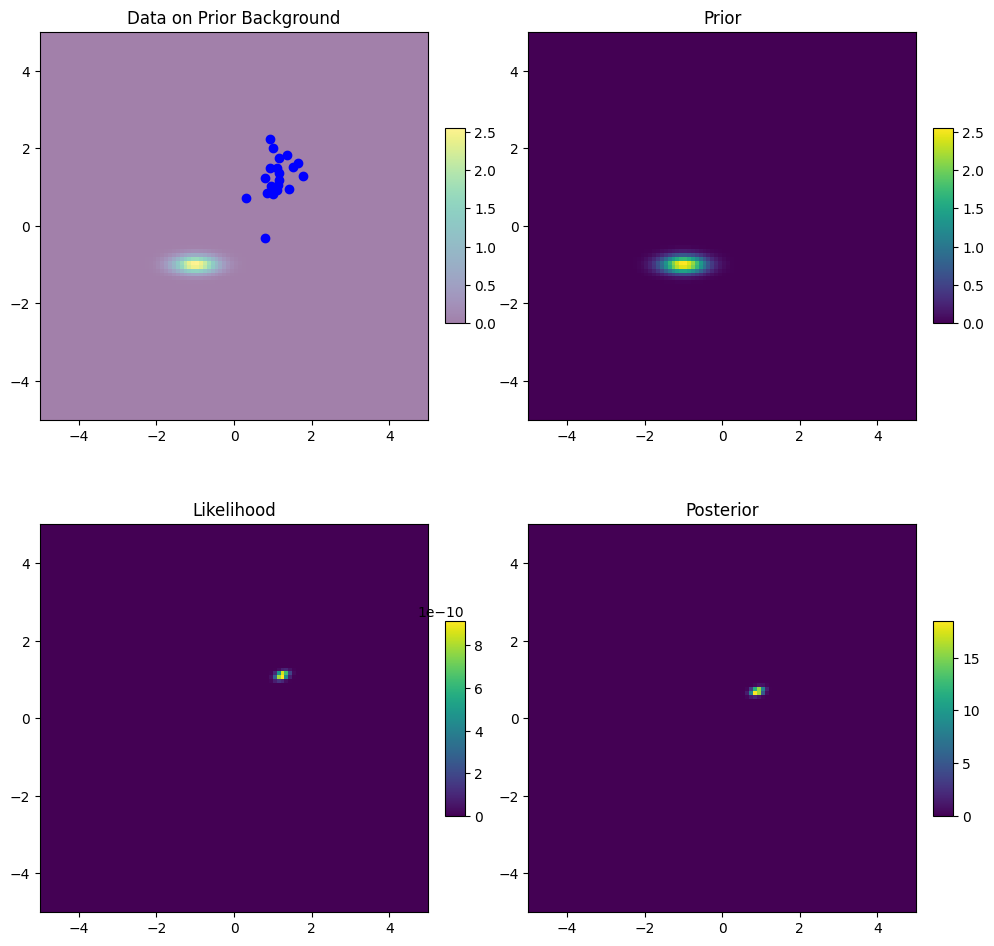

Evidence: 5.499226511959399e-51


In [13]:
import numpy as np
from scipy.stats import multivariate_normal, norm
import matplotlib.pyplot as plt

# Generate synthetic data for illustration
np.random.seed(0)
mean_true = [1, 1]
cov_matrix = [[0.1, 0.05], [0.05, 0.25]]
D = np.random.multivariate_normal(mean_true, cov_matrix, size=20)

# Define the 2D likelihood function
def likelihood(mu_x, mu_y):
    return np.prod(multivariate_normal.pdf(D, mean=[mu_x, mu_y], cov=cov_matrix))

# Define the priors for mu_x and mu_y
def prior_x(mu_x):
    return norm.pdf(mu_x, -1, 0.15)

def prior_y(mu_y):
    return norm.pdf(mu_y, -1, 0.4)

# Set up a grid of values for mu_x and mu_y
grid_size = 100

mu_x_values = np.linspace(-5, 5, grid_size)
mu_y_values = np.linspace(-5, 5, grid_size)
likelihood_grid = np.zeros((grid_size, grid_size))
prior_grid = np.zeros((grid_size, grid_size))

# Compute the likelihood and prior at each grid point
for i, mu_x in enumerate(mu_x_values):
    for j, mu_y in enumerate(mu_y_values):
        likelihood_grid[i, j] = likelihood(mu_x, mu_y)
        prior_grid[i, j] = prior_x(mu_x) * prior_y(mu_y)

# Approximate the evidence by summing the product of the likelihood and prior at each grid point
# and then multiplying by the area represented by each grid point.
evidence = np.sum(likelihood_grid * prior_grid) * (mu_x_values[1] - mu_x_values[0]) * (mu_y_values[1] - mu_y_values[0])

# Compute the posterior
posterior_grid = (likelihood_grid * prior_grid) / evidence

# Plotting

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Data plot
cax_data = axes[0, 0].imshow(prior_grid, extent=(-5, 5, -5, 5), origin='lower', alpha=0.5)
cbar_data = plt.colorbar(cax_data, ax=axes[0, 0], aspect=10, fraction=0.046, pad=0.04)
cbar_data.ax.tick_params(labelsize=10)
axes[0, 0].scatter(D[:, 0], D[:, 1], color='blue')
axes[0, 0].set_xlim(-5, 5)
axes[0, 0].set_ylim(-5, 5)
axes[0, 0].set_title('Data on Prior Background')

# Prior plot
cax2 = axes[0, 1].imshow(prior_grid, extent=(-5, 5, -5, 5), origin='lower')
cbar2 = plt.colorbar(cax2, ax=axes[0, 1], aspect=10, fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=10)
axes[0, 1].set_title('Prior')

# Likelihood plot
cax1 = axes[1, 0].imshow(likelihood_grid, extent=(-5, 5, -5, 5), origin='lower')
cbar1 = plt.colorbar(cax1, ax=axes[1, 0], aspect=10, fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)
axes[1, 0].set_title('Likelihood')

# Posterior plot
cax4 = axes[1, 1].imshow(posterior_grid, extent=(-5, 5, -5, 5), origin='lower')
cbar4 = plt.colorbar(cax4, ax=axes[1, 1], aspect=10, fraction=0.046, pad=0.04)
cbar4.ax.tick_params(labelsize=10)
axes[1, 1].set_title('Posterior')

plt.tight_layout()
plt.show()

print("Evidence:", evidence)

# MCMC

## 1D Gaussian

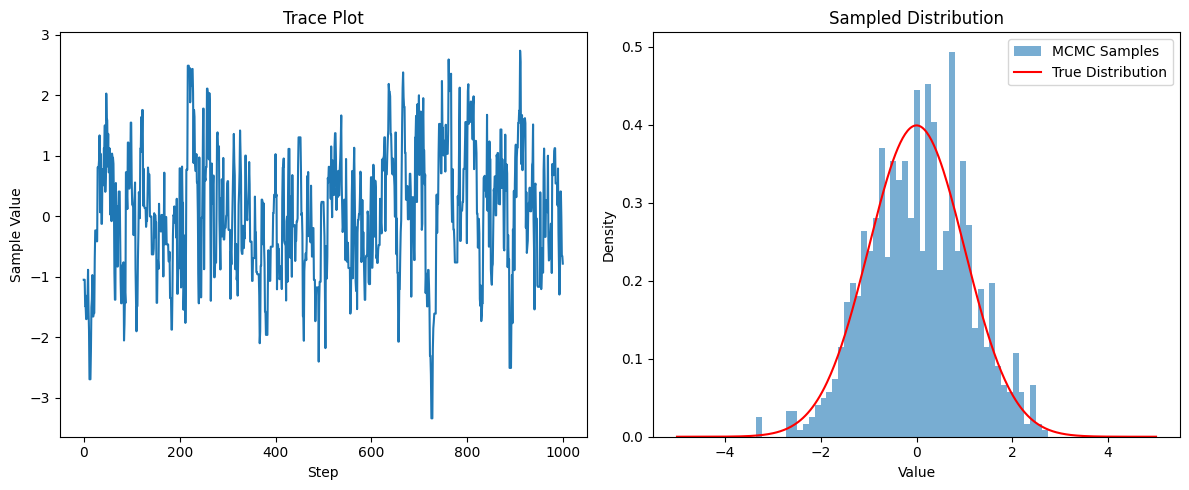

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution: a 1D Gaussian
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Metropolis sampling
def metropolis_sampling(steps=1000, proposal_std=1.0):
    samples = []
    current_sample = 0.0  # start from x=0 for simplicity

    for step in range(steps):
        # Propose a new sample
        proposed_sample = current_sample + proposal_std * np.random.randn()

        # Calculate acceptance ratio
        alpha = target_distribution(proposed_sample) / target_distribution(current_sample)

        # Decide to accept or reject the proposed sample
        if np.random.rand() < alpha:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

samples = metropolis_sampling()

# Plotting
plt.figure(figsize=(12, 5))

# Trace plot
plt.subplot(1, 2, 1)
plt.plot(samples)
plt.title("Trace Plot")
plt.xlabel("Step")
plt.ylabel("Sample Value")

# Histogram
plt.subplot(1, 2, 2)
x = np.linspace(-5, 5, 400)
plt.hist(samples, bins=50, density=True, label="MCMC Samples", alpha=0.6)
plt.plot(x, target_distribution(x), 'r', label="True Distribution")
plt.title("Sampled Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

## 2D Gaussian

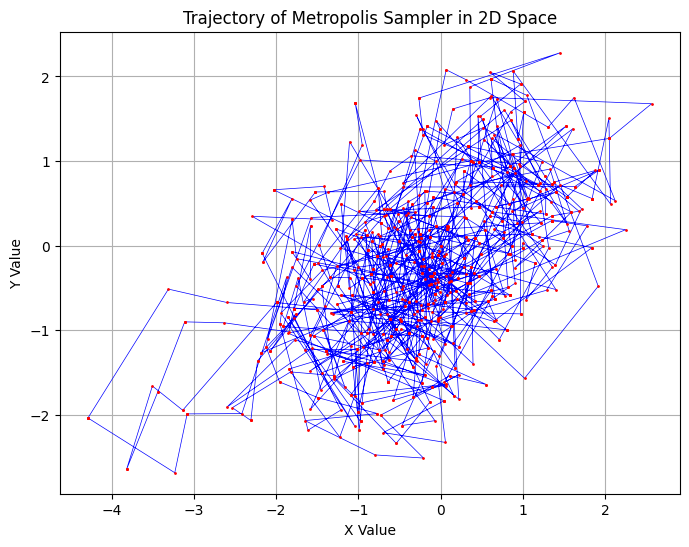

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D target distribution: a 2D Gaussian
def target_distribution(x, y):
    mu = [0, 0]
    cov_matrix = [[1, 0.5], [0.5, 1]]  # slightly correlated dimensions for illustration
    det = np.linalg.det(cov_matrix)
    inv_cov = np.linalg.inv(cov_matrix)

    mahalanobis = (x - mu[0]) ** 2 * inv_cov[0, 0] + 2 * (x - mu[0]) * (y - mu[1]) * inv_cov[0, 1] + (y - mu[1]) ** 2 * inv_cov[1, 1]
    return np.exp(-0.5 * mahalanobis) / (2 * np.pi * np.sqrt(det))

# Metropolis sampling for 2D
def metropolis_sampling_2d(steps=1000, proposal_std=1.0):
    samples = []
    current_sample = np.array([0.0, 0.0])  # start from (0, 0) for simplicity

    for step in range(steps):
        # Propose a new sample in 2D
        proposed_sample = current_sample + proposal_std * np.random.randn(2)

        # Calculate acceptance ratio
        alpha = target_distribution(*proposed_sample) / target_distribution(*current_sample)

        # Decide to accept or reject the proposed sample
        if np.random.rand() < alpha: #1 < alpha:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

samples_2d = metropolis_sampling_2d()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'b-', lw=0.5)
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'r.', markersize=2)
plt.title("Trajectory of Metropolis Sampler in 2D Space")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.grid(True)
plt.show()


## Double peak

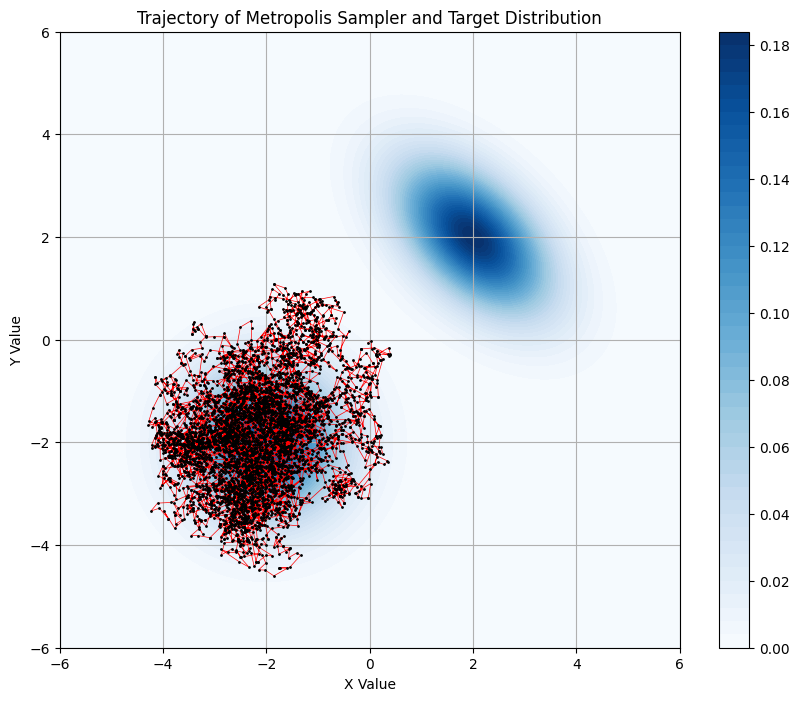

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D target distribution: two separated 2D Gaussian peaks
def target_distribution(x, y):
    # Peak 1
    mu1 = [-2, -2]
    cov1 = [[1, 0], [0, 1]]

    # Peak 2
    mu2 = [2, 2]
    cov2 = [[1, -0.5], [-0.5, 1]]

    # Gaussian function
    def gaussian(x, y, mu, cov):
        det = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)
        mahalanobis = (x - mu[0]) ** 2 * inv_cov[0, 0] + 2 * (x - mu[0]) * (y - mu[1]) * inv_cov[0, 1] + (y - mu[1]) ** 2 * inv_cov[1, 1]
        return np.exp(-0.5 * mahalanobis) / (2 * np.pi * np.sqrt(det))

    # Return sum of two peaks
    return gaussian(x, y, mu1, cov1) + gaussian(x, y, mu2, cov2)

samples_2d = metropolis_sampling_2d(steps=5000, proposal_std=0.15)

# Generate contour plot for target distribution
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([target_distribution(xv, yv) for xv, yv in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 50, cmap="Blues")
plt.colorbar()
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'r-', lw=0.5)
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'k.', markersize=2)
plt.title("Trajectory of Metropolis Sampler and Target Distribution")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.grid(True)
plt.show()


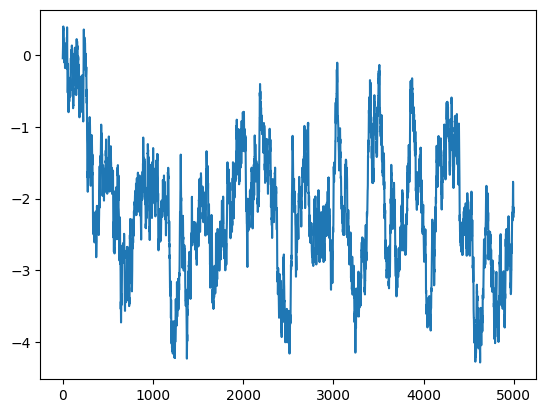

In [17]:
plt.plot(samples_2d[:, 0])

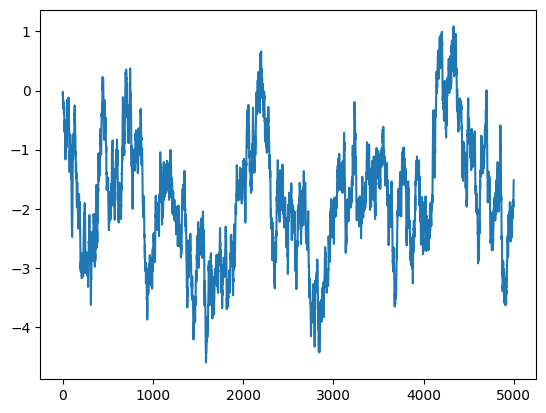

In [18]:
plt.plot(samples_2d[:, 1])